In [121]:
import numpy as np; import pylab as pl; import os, time, pickle; import matplotlib.pyplot as plt
ITD_limit = 160
stim_no = 33
stim_range = np.arange(-ITD_limit, ITD_limit, 2*ITD_limit/stim_no)
N = 12500
simtime = 1*1000.
t_trans = 150.
f = open('po_init', 'rb'); pitds = pickle.load(f); f.close()
po_init=pitds

n_cores = 4
trial_no = 20
tr=0

In [2]:
import neo
import elephant.statistics as stats
import quantities as pq

In [3]:
raiz = 'Results/N12500g8_Jrec=0.01/spikes-all-st{stim}-tr{tr}-12501-{core}.dat'
stim = 0

In [144]:
def pega_resultados(raiz, tr=0, stim=0):
    spkt = []
    for core in range(n_cores):
        spkt.append(np.loadtxt(raiz.format(core=core, tr=tr, stim=stim), skiprows=3))
    return np.concatenate(spkt)
    
def generate_spktm(file):
    spike_trains = [file[:,1][np.where(file[:,0]==n)[0]] for n in range(1,N+1)]

    return spike_trains

def plot_raster(spike_time_matrix, fig_size=(20,10), colors = ["r", "b"]):
    plt.figure(figsize=fig_size)
    for i in range(int(N*0.8)):
        if len(spike_time_matrix[i]) != 0:
            plt.plot(spike_time_matrix[i], i*np.ones(len(spike_time_matrix[i])),"o", c=colors[0], markersize=1)
    for i in range(int(N*0.8),N):
        if len(spike_time_matrix[i]) != 0:
            plt.plot(spike_time_matrix[i], i*np.ones(len(spike_time_matrix[i])),"o", c=colors[1], markersize=1)

def calculate_fr(file):
    senders = file[:,0]
    fr = np.array([len(np.where(senders == n)[0]) / ((simtime-t_trans)/1000) for n in range(1,N+1)])
    return fr

def compute_inst_fr(spike_time_matrix):
    neo_spktm = [neo.SpikeTrain(spike_time_matrix[n], t_stop=1000*pq.ms, units="ms") for n in range(N)]

    # Compute and plot the PSTH
    bin_size = 10 * pq.ms

    psth_exc = stats.time_histogram(neo_spktm[:int(N*0.8)], bin_size, output='rate')
    psth_inh = stats.time_histogram(neo_spktm[int(N*0.8):], bin_size, output='rate')
    fig, ax = plt.subplots(1, 1, figsize=(20,2))
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Firing rate (Hz)")
    plt.plot(psth_exc.times.rescale('s'), psth_exc.rescale('Hz'),'r')
    plt.plot(psth_inh.times.rescale('s'), psth_inh.rescale('Hz'),'b')
    plt.show()

In [136]:
file = pega_resultados(raiz)

In [155]:
spktm = generate_spktm(file)

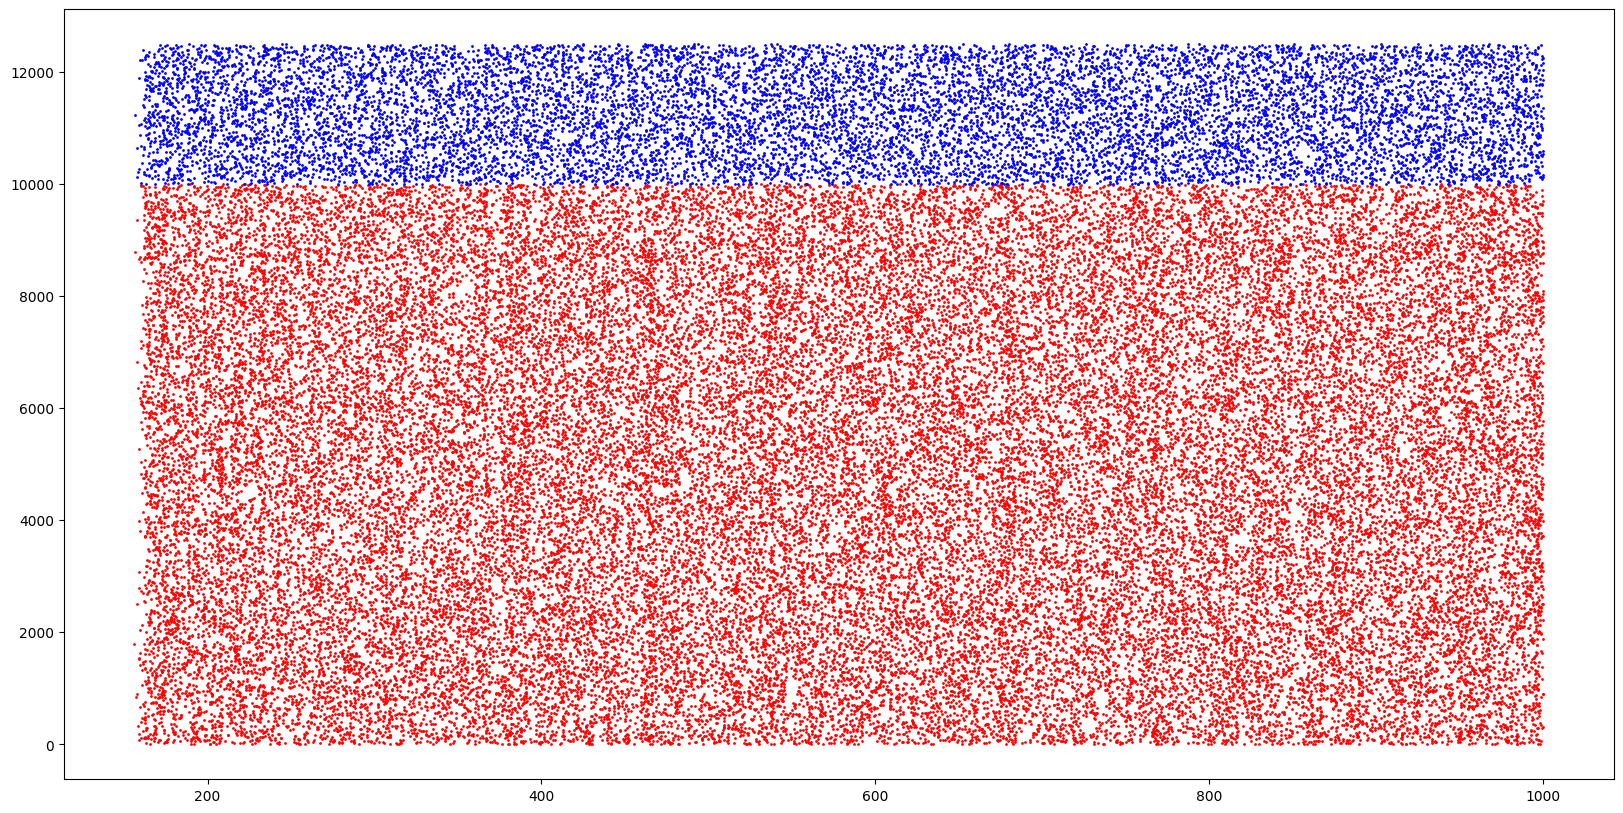

In [156]:
plot_raster(spktm)

In [8]:
frs = calculate_fr(file)

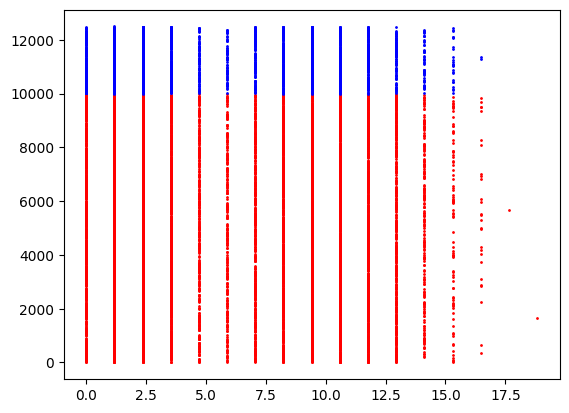

In [9]:
for i in range(int(N*0.8)):
    plt.plot(frs[i], i,"o", c="r", markersize=1)
for i in range(int(N*0.8),N):
    plt.plot(frs[i], i,"o", c="b", markersize=1)

/home/lavinia-lascon/anaconda3/envs/lascon/lib/python3.11/site-packages/elephant/conversion.py:1130: UserWarning: Binning discarded 4 last spike(s) of the input spiketrain
  warnings.warn("Binning discarded {} last spike(s) of the "


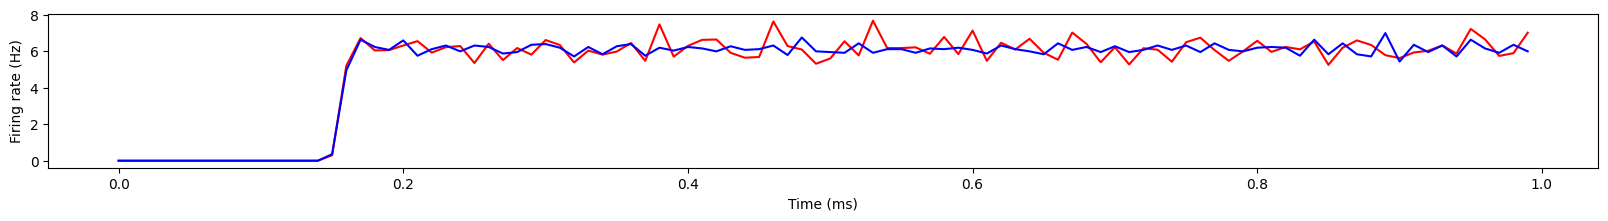

In [10]:
compute_inst_fr(spktm['0'])

## Getting data from the full experiment

In [11]:
files = []

for tr in range(trial_no):
    file = []
    for stim in range(stim_no):
        file.append(pega_resultados(raiz, tr, stim))
    files.append(file)
    

In [12]:
def generate_TC(file):
    tc = []
    for st in range(len(stim_range)):
        fr = calculate_fr(file[st])
        tc.append(fr)
    return tc

def gen_all_TC(files):
    tcs = []
    for tr in range(trial_no):
        tc = generate_TC(files[tr])
        print(tr)
        tcs.append(tc)
    return tcs

In [13]:
def plot_TC(tc, neurons, label=po_init):
    for neuron in neurons:
        plt.plot(stim_range[:], tc[:,neuron], 'o-', label=round(label[neuron],1))
        plt.xlabel("ITD Estimulo (ms)")
        plt.ylabel("Taxa de disparo (spike/s)")
    plt.legend(bbox_to_anchor=(1.25,1))

In [14]:
#tcs = gen_all_TC(files)
#file = open('tcs_Jrec=0.01', 'wb'); pickle.dump(tcs, file); file.close()

In [15]:
f = open('tcs_Jrec=0.01', 'rb'); tcs = pickle.load(f); f.close()

In [16]:
np.shape(np.array(tcs)[0,:,0])

(33,)

In [17]:
np.shape(tcs)

(20, 33, 12500)

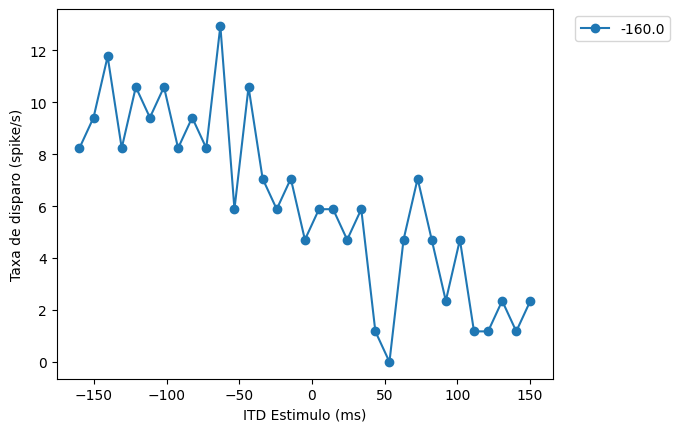

In [18]:
plot_TC(np.array(tcs)[0],range(1,2))

In [19]:
tc_mean = np.mean(tcs, axis=0)

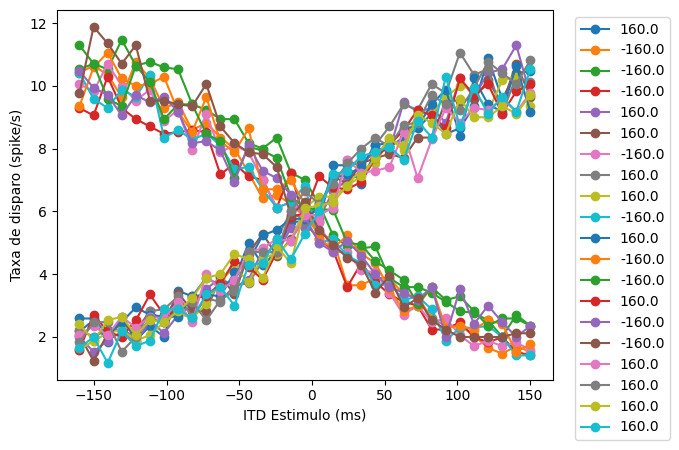

In [20]:
plot_TC(tc_mean, range(800,820))

In [21]:
po_output = []
for n in range(N):
    poo = list(tc_mean[:,n]).index(max(tc_mean[:,n]))
    po_output.append(np.mean(stim_range[poo]))

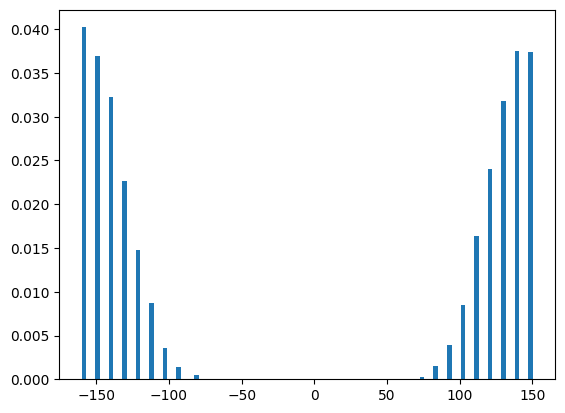

In [263]:
plt.hist(np.array(po_output), bins = 100, density=True);

<Axes: ylabel='Density'>

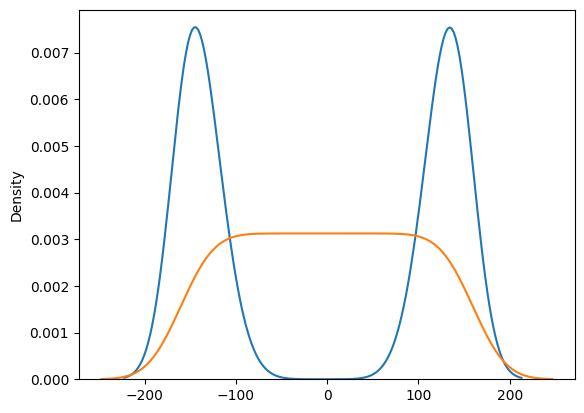

In [273]:
sns.kdeplot(np.array(po_output))
sns.kdeplot(np.arange(-160,160,1))
sns.xaxis

In [332]:
def gen_kde(xs, sigma):
    def gauss(x, mu, sigma):
        return np.exp(-((x - mu) / sigma) ** 2 / 2) / (sigma * np.sqrt(2 * np.pi))
        
    plt.hist(xs, density=True, label='Histogram', bins=100, alpha=.4, ec='w')
    x = np.linspace(xs.min() - 1, xs.max() + 1, 100)
    y = sum(gauss(x, xi, sigma) for xi in xs) / len(xs)
    return x, y

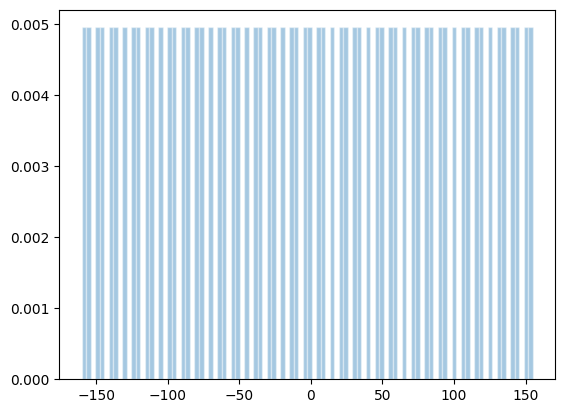

In [333]:
x, kde_uniform = gen_kde(np.arange(-160,160,5),10)

In [351]:
np.where(kl_i<0)

(array([], dtype=int64),)

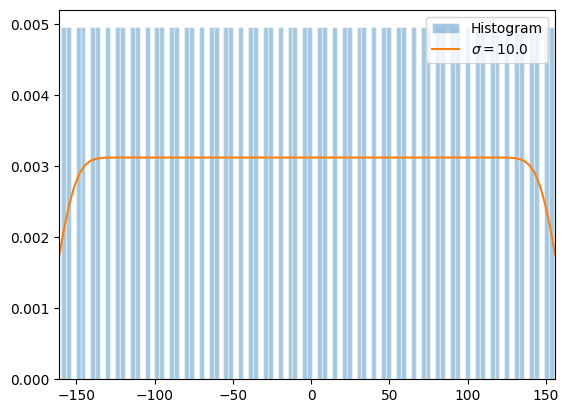

In [314]:
kde_uniform = gen_kde(np.arange(-160,160,5),10)

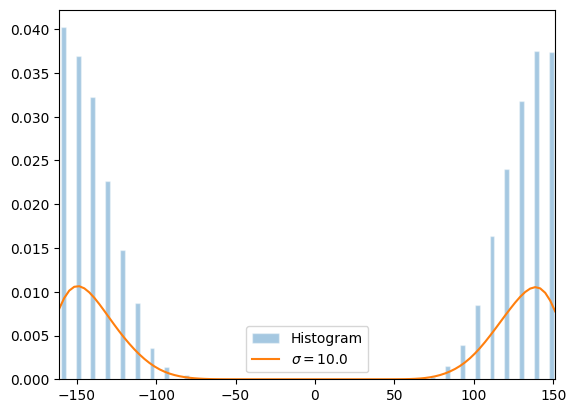

In [311]:
kde_po = gen_kde(np.array(po_output), sigma=10.0)

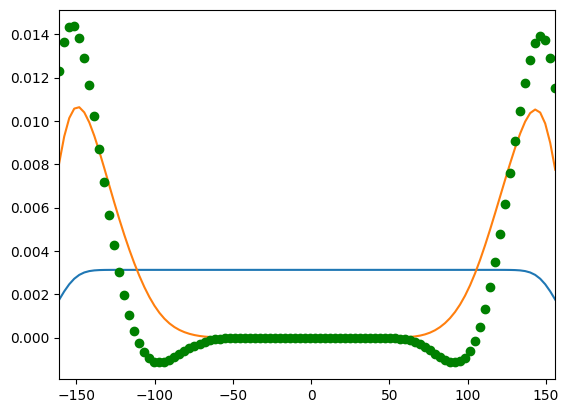

In [357]:
plt.plot(x, kde_uniform)
plt.plot(x, kde_po)
plt.plot(x, kl_i, "o", color="g")
plt.xlim(x[0], x[-1])
plt.show()

In [354]:
def kl_divergence(a, b):
    return [a[i] * np.log(a[i]/b[i]) for i in range(len(a))] #sum(a[i] * np.log(a[i]/b[i]) for i in range(len(a)))

In [355]:
kl_i = kl_divergence(kde_po, kde_uniform)

In [347]:
kl = np.sum(kl_i)

## Sorting

In [23]:
poo_idx = np.argsort(np.array(po_output), axis=-1, kind=None, order=None)

In [24]:
poo_idx

array([10630, 10636, 10573, ...,    64,  5689,  5688])

In [25]:
#po_output[poo_idx]

sorted_spktm = [po_output[n] for n in poo_idx]

In [26]:
sorted_spktm = [spktm['0'][n] for n in poo_idx]

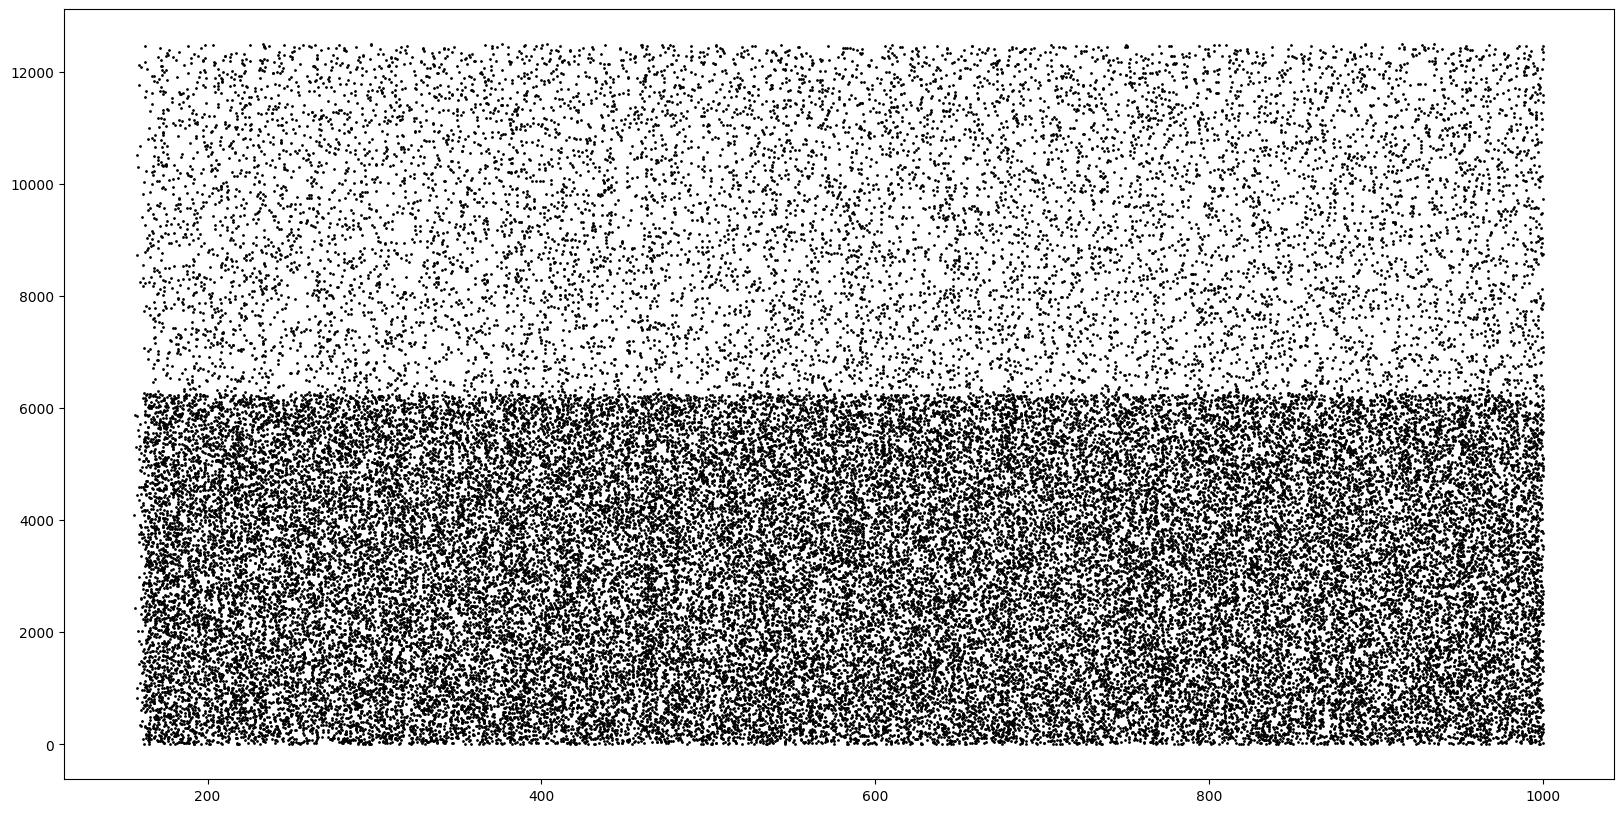

In [31]:
plot_raster(sorted_spktm, colors= ["k", "k"])

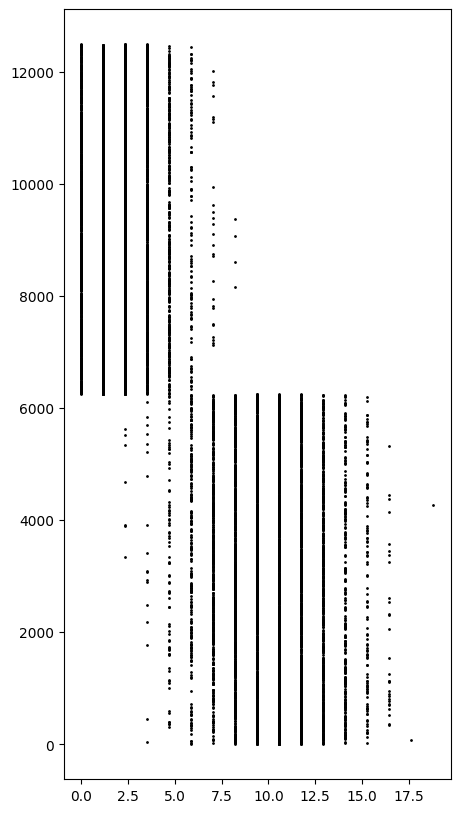

In [57]:
plt.figure(figsize=(5,10))
for i, j in enumerate(poo_idx):
    plt.plot(frs[j], i,"o", c="k", markersize=1)
plt.save 

## One neuron responses

In [163]:
spkts = {}
tr = 0 

for st in range(len(stim_range)):
    spkts[str(st)] = generate_spktm(files[tr][st])

In [173]:
n = 1

In [174]:
po_init[n]

-160.0

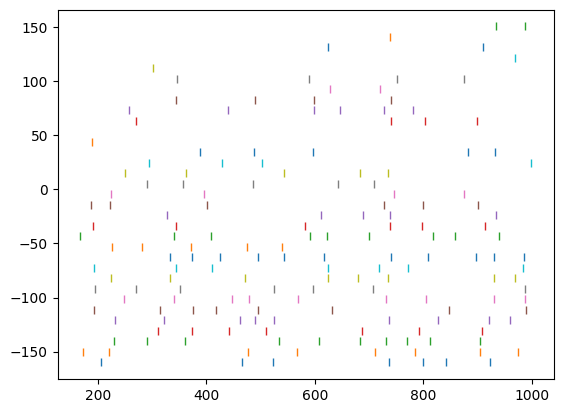

In [175]:
for i, st in enumerate(stim_range):
    plt.plot(spkts[str(i)][n], st*np.ones(len(spkts[str(i)][n])), "|")
#plt.plot(frs[j], i,"o", c="k", markersize=1)

## Metrics

In [200]:
import scipy.optimize
import numpy as np

###
# Fourier components
def _fft_(x):
    n = len(x)
    z = np.fft.fft(x)
    f0 = abs(z[0])/n      # mean     
    f1 = abs(z[1])/(n/2) # 1st order
    return f0, f1

###
# OSI: 1- CV; CV: sum(r exp(j*2*t))/sum(r): t=0...pi (rad)
def _osv_(r, t):
    z = np.sum(r * np.exp(1j *2.*t))/np.sum(r)
    osi = abs(z)  #osi
    #po = np.angle(z) %(2*np.pi) #PO
    return osi

###
# fit von-Mises
def vonMises(xdata,ydata):
    # define a von-Mises fitting function: B + A exp(k cos(2(theta - phi)) -1)
    # p[0] = B
    # p[1] = A
    # p[2] = k (1/D)
    # p[3] = phi
    fitfunc = lambda p, x: p[0] + p[1] * \
                           np.exp( p[2]*( np.cos(2*(x - p[3]))-1.) )
    errfunc = lambda p, x, y: fitfunc(p,x)-y
    
    # initial guess
    p0 = [1., 1., 1., 1.]
    # fit
    p1, success = scipy.optimize.leastsq(errfunc, p0[:],args=(xdata,ydata))
    
    tw = (90./np.pi) * np.arccos(abs(1 + np.log((1.+np.exp(-2.*p1[2]))/2)/p1[2]) )
    
    return p1, fitfunc(p1,xdata), tw, success


In [208]:
OS_idx = []
for i in range(len(tc_mean[0])):
    osi = _osv_(tc_mean[:,i], stim_range)
    OS_idx.append(osi)

In [209]:
np.shape(OS_idx)

(12500,)

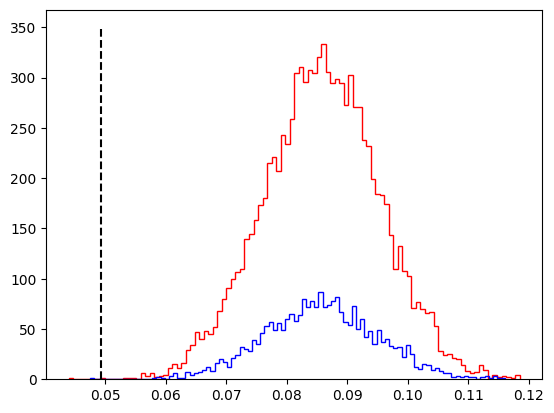

In [238]:
hist = plt.hist(OS_idx[:int(N*0.8)], bins=100, histtype='step', color='r')
hist = plt.hist(OS_idx[int(N*0.8):], bins=100, histtype='step', color='b')
plt.vlines(_osv_(tc_left, stim_range),0,350, linestyles='--', color="k")

In [223]:
# number of LGN neurons contacting one cortical neuron
n_ffw = 50.
# average firing rate of LGN neurons
r_ffw = 20.
# overall rate of the feedforward input
r_base = n_ffw * r_ffw
# modulation in the input
input_mod = 0.1

In [221]:
np.mean(OS_idx)

0.08571179710390697

In [212]:
def ITD_to_rad(x, mITD=160):
    return (x+mITD)/((2*mITD)/np.pi)

In [229]:
r_base = 1
input_mod = 0.1

tc_left = r_base *(1.+ input_mod* np.cos(1*(ITD_to_rad(stim_range) - ITD_to_rad(-160)) ))

tc_right = r_base *(1.+ input_mod* np.cos(1*(ITD_to_rad(stim_range) - ITD_to_rad(160)) ))

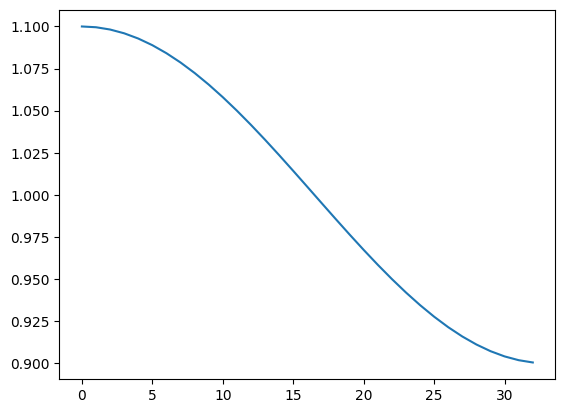

In [226]:
plt.plot(tc_left)

In [228]:
_osv_(tc_left, stim_range)

0.04932133782870689

In [230]:
_osv_(tc_right, stim_range)

0.049453958380697466